In [1]:
from sklearn.svm import SVC, SVR #importing SVC and SVR

In [2]:
import pandas as pd #Importing pandas
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation: No null values

In [6]:
from sklearn.preprocessing import StandardScaler 

Scaling is required, since the values are in different units.

In [7]:
scaler = StandardScaler()

In [8]:
x = data.drop('quality', axis = 1)

In [9]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


<AxesSubplot:>

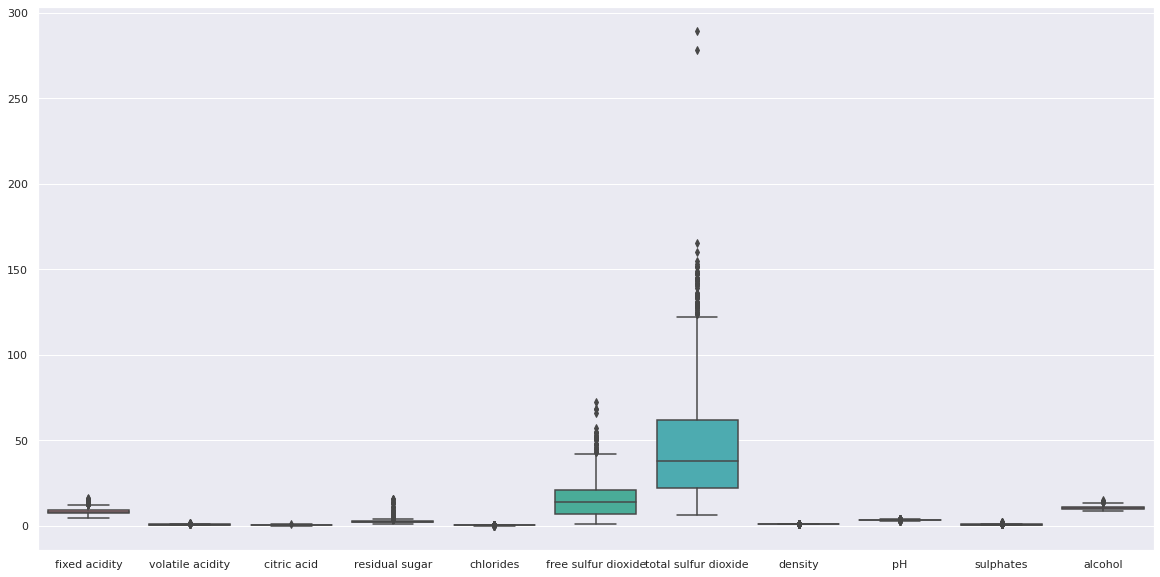

In [10]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = x)

In [11]:
for i in x.columns:
    x[i] = np.where(x[i]<x[i].quantile(0.25),x[i].median(),x[i])
    x[i] = np.where(x[i]>x[i].quantile(0.75),x[i].median(),x[i])
    

<AxesSubplot:>

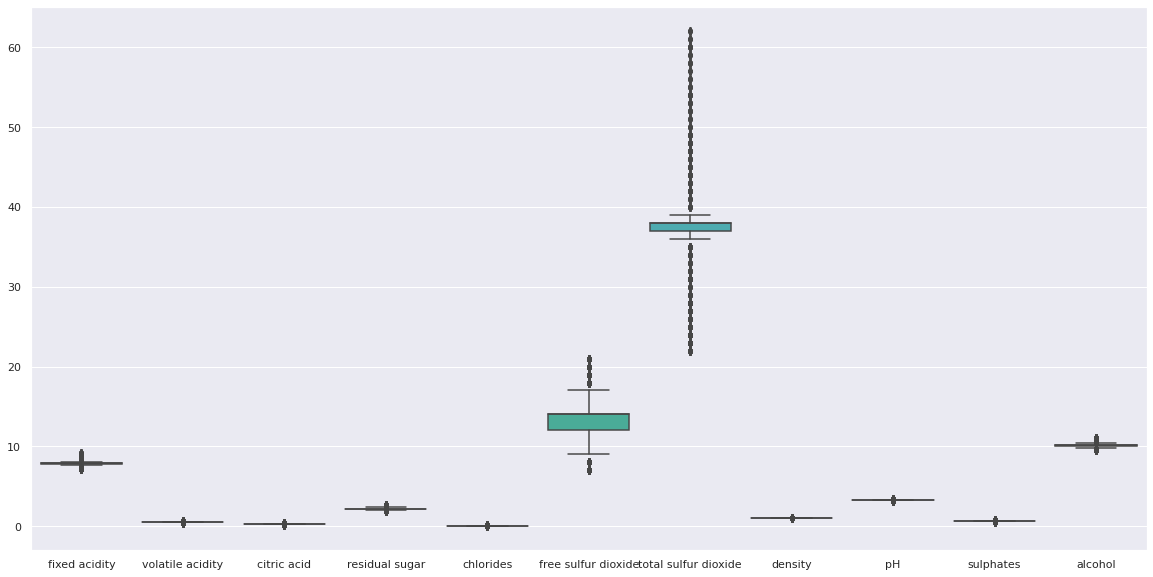

In [12]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = x)

In [13]:
x['fixed acidity'].quantile(0.75)

7.9

In [14]:
y = data['quality']

In [15]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,7.9,0.520,0.26,2.6,0.079,14.0,38.0,0.99675,3.31,0.62,10.4
355,7.9,0.520,0.26,2.4,0.078,17.0,32.0,0.99675,3.31,0.61,10.2
1296,7.9,0.630,0.26,2.2,0.079,14.0,38.0,0.99675,3.31,0.62,9.5
209,7.9,0.520,0.26,2.1,0.079,7.0,38.0,0.99675,3.31,0.62,10.5
140,8.4,0.520,0.11,1.9,0.090,16.0,38.0,0.99650,3.31,0.62,9.6
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.26,1.9,0.079,14.0,38.0,0.99770,3.31,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,14.0,60.0,0.99638,3.29,0.62,10.9
860,7.2,0.620,0.26,2.2,0.077,15.0,38.0,0.99746,3.31,0.62,9.5
1459,7.9,0.520,0.35,2.2,0.079,7.0,38.0,0.99675,3.32,0.62,10.2


In [19]:
X_train.shape

(1071, 11)

In [20]:
X_test.shape

(528, 11)

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.fit_transform(X_test)

In [23]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [24]:
y_train

548     6
355     6
1296    5
209     7
140     5
       ..
1130    6
1294    6
860     5
1459    7
1126    6
Name: quality, Length: 1071, dtype: int64

In [25]:
model = SVC()

In [26]:
model.fit(X_train,y_train)

SVC()

In [27]:
model.score(X_train, y_train)

0.6601307189542484

In [28]:
 data2 = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [29]:
data2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
x = data2.drop('v',axis =0)

KeyError: "['v'] not found in axis"